In [1]:
import torch
from models.conv_net import ConvNetVAE
import torchvision
import torchvision.transforms as transforms

In [2]:
device = torch.device('cuda')
save_dir = '/home/tingchen/bayes-ae-save/'
pretrain_name = 'conv_net_omniglot'
model = ConvNetVAE(latent_dim=2).to(device)

model.load_state_dict(
            torch.load(f'{save_dir}models/{pretrain_name}.pt'))

<All keys matched successfully>

In [3]:
data_dir = '/home/tingchen/data/'
transform = transforms.Compose(
            [transforms.ToTensor(),
             transforms.Resize(size=104)])
omniglot_train = torchvision.datasets.Omniglot(root=data_dir,
                                                background=True,
                                                transform=transform,
                                                download=False)
omniglot_val = torchvision.datasets.Omniglot(root=data_dir,
                                                background=False,
                                                transform=transform,
                                                download=False)
train_loader = torch.utils.data.DataLoader(omniglot_train,
                                            batch_size=128,
                                            shuffle=True)
valid_loader = torch.utils.data.DataLoader(omniglot_val,
                                            batch_size=128,
                                                shuffle=True)

In [4]:
len(omniglot_train)

19280

In [5]:
train_batch = next(iter(train_loader))

In [6]:
train_batch[0].shape

torch.Size([128, 1, 104, 104])

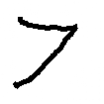

In [6]:
transform = transforms.ToPILImage()

transform(train_batch[0][4:5].reshape(-1, 104, 104))

In [23]:
model(train_batch[0][3:4].to(device))[-1][0].shape

torch.Size([1, 1, 104, 104])

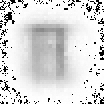

In [7]:
transform(model(train_batch[0][4:5].to(device))[-1][0].reshape(1,104,104))